In [0]:
import torch
import pandas as pd
import re
import csv
import numpy as np
import torchtext
from collections import defaultdict
from torchtext import data
import nltk
import torch.nn as nn
from decimal import *
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from nltk import sent_tokenize,word_tokenize
from torchtext import data,vocab
from tqdm.notebook import tqdm, tqdm_notebook,tnrange
from sklearn.metrics import accuracy_score
from torchsummary import summary
torch.set_printoptions(precision=10)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
PATH = '/content/drive/My Drive/Personality/'

In [0]:
def tokenize(s):
    s = s.lower()
    return re.findall(r"[\w']+|[.,!?;]",s)

In [0]:
txt_field = data.Field(sequential = True,tokenize = tokenize,include_lengths = False,use_vocab=True)
label_field = data.Field(sequential = False,use_vocab=False,pad_token=None,unk_token=None)
# vec_field = data.Field(sequential = False,use_vocab =False , pad_token= None, unk_token = None)
train_val_fields = [('EssayText',txt_field),('Personality',label_field)]
# train_val_fields = [('s0',txt_field), ('s1',txt_field), ('s2',txt_field), ('s3',txt_field), ('s4',txt_field), ('s5',txt_field), ('s6',txt_field), ('s7',txt_field), ('s8',txt_field), ('s9',txt_field), ('s10',txt_field), ('s11',txt_field), ('s12',txt_field), ('s13',txt_field), ('s14',txt_field), ('s15',txt_field), ('s16',txt_field), ('s17',txt_field), ('s18',txt_field), ('s19',txt_field), ('s20',txt_field), ('s21',txt_field), ('s22',txt_field), ('s23',txt_field), ('s24',txt_field), ('s25',txt_field), ('s26',txt_field), ('s27',txt_field), ('s28',txt_field), ('s29',txt_field), ('s30',txt_field), ('s31',txt_field), ('s32',txt_field), ('s33',txt_field), ('s34',txt_field), ('s35',txt_field), ('s36',txt_field), ('s37',txt_field), ('s38',txt_field), ('s39',txt_field), ('s40',txt_field), ('s41',txt_field), ('s42',txt_field), ('s43',txt_field), ('s44',txt_field), ('s45',txt_field), ('s46',txt_field), ('s47',txt_field), ('s48',txt_field), ('s49',txt_field), ('s50',txt_field), ('s51',txt_field), ('s52',txt_field), ('s53',txt_field), ('s54',txt_field), ('s55',txt_field), ('s56',txt_field), ('s57',txt_field), ('s58',txt_field), ('s59',txt_field), ('s60',txt_field), ('s61',txt_field), ('s62',txt_field), ('s63',txt_field), ('s64',txt_field), ('s65',txt_field), ('s66',txt_field), ('s67',txt_field), ('s68',txt_field), ('s69',txt_field), ('s70',txt_field), ('s71',txt_field), ('s72',txt_field), ('s73',txt_field), ('s74',txt_field), ('s75',txt_field), ('s76',txt_field), ('s77',txt_field), ('s78',txt_field), ('s79',txt_field), ('s80',txt_field), ('s81',txt_field), ('s82',txt_field), ('s83',txt_field), ('s84',txt_field), ('s85',txt_field), ('s86',txt_field), ('s87',txt_field), ('s88',txt_field), ('s89',txt_field), ('s90',txt_field), ('s91',txt_field), ('s92',txt_field), ('s93',txt_field), ('s94',txt_field), ('s95',txt_field), ('s96',txt_field), ('s97',txt_field), ('s98',txt_field), ('s99',txt_field), ('s100',txt_field), ('s101',txt_field), ('s102',txt_field), ('s103',txt_field), ('s104',txt_field), ('s105',txt_field), ('s106',txt_field), ('s107',txt_field), ('s108',txt_field), ('s109',txt_field), ('s110',txt_field), ('s111',txt_field), ('s112',txt_field), ('s113',txt_field), ('s114',txt_field), ('s115',txt_field), ('s116',txt_field), ('s117',txt_field), ('s118',txt_field), ('s119',txt_field), ('s120',txt_field), ('s121',txt_field), ('s122',txt_field), ('s123',txt_field), ('s124',txt_field), ('s125',txt_field), ('s126',txt_field), ('s127',txt_field), ('s128',txt_field), ('s129',txt_field), ('s130',txt_field), ('s131',txt_field), ('s132',txt_field), ('s133',txt_field), ('s134',txt_field), ('s135',txt_field), ('s136',txt_field), ('s137',txt_field), ('s138',txt_field), ('s139',txt_field), ('s140',txt_field), ('s141',txt_field), ('s142',txt_field), ('s143',txt_field), ('s144',txt_field), ('s145',txt_field), ('s146',txt_field), ('s147',txt_field), ('s148',txt_field), ('s149',txt_field), ('s150',txt_field), ('s151',txt_field), ('s152',txt_field), ('s153',txt_field), ('s154',txt_field), ('s155',txt_field), ('s156',txt_field), ('s157',txt_field), ('s158',txt_field), ('s159',txt_field), ('s160',txt_field), ('s161',txt_field), ('s162',txt_field), ('s163',txt_field), ('s164',txt_field), ('s165',txt_field), ('s166',txt_field), ('s167',txt_field), ('s168',txt_field), ('s169',txt_field), ('s170',txt_field), ('s171',txt_field), ('s172',txt_field), ('s173',txt_field), ('s174',txt_field), ('s175',txt_field), ('s176',txt_field), ('s177',txt_field), ('s178',txt_field), ('s179',txt_field), ('s180',txt_field), ('s181',txt_field), ('s182',txt_field), ('s183',txt_field), ('s184',txt_field), ('s185',txt_field), ('s186',txt_field), ('s187',txt_field), ('s188',txt_field), ('s189',txt_field), ('s190',txt_field), ('s191',txt_field), ('s192',txt_field), ('s193',txt_field), ('s194',txt_field), ('s195',txt_field), ('s196',txt_field), ('s197',txt_field), ('s198',txt_field), ('s199',txt_field), ('s200',txt_field), ('s201',txt_field), ('s202',txt_field), ('s203',txt_field), ('s204',txt_field), ('s205',txt_field), ('s206',txt_field), ('s207',txt_field), ('s208',txt_field), ('s209',txt_field), ('s210',txt_field), ('s211',txt_field), ('s212',txt_field), ('s213',txt_field), ('s214',txt_field), ('s215',txt_field), ('s216',txt_field), ('s217',txt_field), ('s218',txt_field), ('s219',txt_field), ('s220',txt_field), ('s221',txt_field), ('s222',txt_field), ('s223',txt_field), ('s224',txt_field), ('s225',txt_field), ('s226',txt_field), ('s227',txt_field), ('s228',txt_field), ('s229',txt_field), ('s230',txt_field), ('s231',txt_field), ('s232',txt_field), ('s233',txt_field), ('s234',txt_field), ('s235',txt_field), ('s236',txt_field), ('s237',txt_field), ('s238',txt_field), ('s239',txt_field), ('s240',txt_field), ('s241',txt_field), ('s242',txt_field), ('s243',txt_field), ('s244',txt_field), ('s245',txt_field), ('s246',txt_field), ('s247',txt_field), ('s248',txt_field), ('s249',txt_field), ('s250',txt_field), ('s251',txt_field), ('s252',txt_field), ('s253',txt_field), ('s254',txt_field), ('s255',txt_field), ('s256',txt_field), ('s257',txt_field), ('s258',txt_field), ('s259',txt_field), ('s260',txt_field), ('s261',txt_field), ('s262',txt_field), ('s263',txt_field), ('s264',txt_field), ('s265',txt_field), ('s266',txt_field), ('s267',txt_field), ('s268',txt_field), ('s269',txt_field), ('s270',txt_field), ('s271',txt_field), ('s272',txt_field), ('s273',txt_field), ('s274',txt_field), ('s275',txt_field), ('s276',txt_field), ('s277',txt_field), ('s278',txt_field), ('s279',txt_field), ('s280',txt_field), ('s281',txt_field), ('s282',txt_field), ('s283',txt_field), ('s284',txt_field), ('s285',txt_field), ('s286',txt_field), ('s287',txt_field), ('s288',txt_field), ('s289',txt_field), ('s290',txt_field), ('s291',txt_field), ('s292',txt_field), ('s293',txt_field), ('s294',txt_field), ('s295',txt_field), ('s296',txt_field), ('s297',txt_field), ('s298',txt_field), ('s299',txt_field), ('s300',txt_field), ('s301',txt_field), ('s302',txt_field), ('s303',txt_field), ('s304',txt_field), ('s305',txt_field), ('s306',txt_field), ('s307',txt_field), ('s308',txt_field), ('s309',txt_field), ('s310',txt_field), ('s311',txt_field), ('s312',txt_field), ('s313',txt_field), ('s314',txt_field), ('s315',txt_field), ('s316',txt_field), ('s317',txt_field), ('s318',txt_field), ('s319',txt_field), ('s320',txt_field), ('s321',txt_field), ('s322',txt_field), ('s323',txt_field),('Personality',label_field),('Mariesse',None),('idx',vec_field)]

In [0]:
train,val = data.TabularDataset.splits(path = PATH,format = 'csv',train='Data_text/trainEXT.csv',validation = 'Data_text/testEXT.csv',fields = train_val_fields)

In [0]:
txt_field.build_vocab(train,val,vectors = "glove.6B.300d",max_size = 10000)

In [0]:
label_field.build_vocab(train)
# vec_field.build_vocab(train)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [0]:
traindl,valdl = data.BucketIterator.splits(datasets=(train,val),batch_size = 16,device = device,sort_key = lambda x:len(x.EssayText),sort_within_batch = False)

In [0]:
class CNN1d(nn.Module):
    def __init__(self,vocab_size,embedding_dim,pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size,embedding_dim,padding_idx = pad_idx)
        self.convs = nn.ModuleList([nn.Conv1d(in_channels = embedding_dim,out_channels = 80,kernel_size = fs) for fs in (3,4,5)])
        self.conv2 = nn.Conv1d(in_channels = 1,out_channels = 100,kernel_size = (2))
        self.fc1 = nn.Linear(300,80) #Change this
        # self.fc3 = nn.Linear() 
        self.fc2 = nn.Linear(80,1)
        self.dropout = nn.Dropout(0.5)
    def forward(self,text):
        # print(text.size(),'text')
        embedded = self.embedding(text.T)
        # print(embedded.size(),"embedded")##(16*X*300)
        embedded = embedded.permute(0,2,1) #16*300*x
        # print(embedded.size(),"embedded after")
        # embedded = embedded.unsqueeze(0) ##1*16*300*X
        # print(embedded.size())
        x=embedded.size(2)
        y=3000-x
        batch_size=embedded.size(0)
        z = torch.zeros(batch_size,300,y,dtype = embedded.dtype,device = embedded.device)
        lz=[embedded,z]
        zcat = torch.cat(lz, dim = 2,)
        conved = [F.relu(conv(zcat)) for conv in self.convs]
        pooled2 = []
        for c in conved:
          pooled2.append(F.max_pool1d(c,c.shape[2]))
        pooled2 = [f.permute(0,2,1) for f in pooled2]
        pooled = [F.max_pool1d(conv,(2)) for conv in pooled2] #25

        pooled2 = [F.relu(self.conv2(p1)) for p1 in pooled]
        pooled3 = []
        for c in pooled2:
          pooled3.append(F.max_pool1d(c,c.shape[2]))
        final = torch.cat(pooled3,dim = 1)
        final = final.reshape(batch_size,300)
        full1 = self.fc1(final)
        # l.append(full1)
          # mean = torch.mean(torch.stack(l),0,keepdim=True).squeeze()
        full2 = self.fc2(full1)
        return full2

In [0]:
input_dim = len(txt_field.vocab)
embedding_dim = 300
pad_idx = txt_field.vocab.stoi[txt_field.pad_token]
model = CNN1d(input_dim,embedding_dim,pad_idx)
print(model)

CNN1d(
  (embedding): Embedding(10002, 300, padding_idx=1)
  (convs): ModuleList(
    (0): Conv1d(300, 80, kernel_size=(3,), stride=(1,))
    (1): Conv1d(300, 80, kernel_size=(4,), stride=(1,))
    (2): Conv1d(300, 80, kernel_size=(5,), stride=(1,))
  )
  (conv2): Conv1d(1, 100, kernel_size=(2,), stride=(1,))
  (fc1): Linear(in_features=300, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [0]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 3,313,301 trainable parameters


In [0]:
unk_idx = txt_field.vocab.stoi[txt_field.unk_token]
model.embedding.weight.data[unk_idx] = torch.zeros(300)
model.embedding.weight.data[pad_idx] = torch.zeros(300)

In [0]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [0]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [0]:
def train(model,iterator,optimizer,criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()
        mariesse_vecs = np.zeros((batch.batch_size,84))
        predictions = model(batch.EssayText).squeeze(1)
        batch.Personality = batch.Personality.type_as(predictions)
        loss = criterion(predictions,batch.Personality)
        acc = binary_accuracy(predictions,batch.Personality)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss/len(iterator),epoch_acc/len(iterator)

In [0]:
def evaluate(model,iterator,criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            mariesse_vecs = np.zeros((batch.batch_size,84))
            predictions = model(batch.EssayText).squeeze(1)
            batch.Personality = batch.Personality.type_as(predictions)
            loss = criterion(predictions,batch.Personality)
            #print("predictions",predictions)
            acc = binary_accuracy(predictions,batch.Personality)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss/len(iterator),epoch_acc/len(iterator)        

In [0]:
import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [0]:
N_EPOCHS = 20

best_valid_loss = float('inf')
train_loss_list = []
valid_loss_list = []
for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, traindl, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valdl, criterion)
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), PATH+ 'EXT.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')



Epoch: 01 | Epoch Time: 0m 4s
	Train Loss: 0.727 | Train Acc: 51.13%
	 Val. Loss: 0.696 |  Val. Acc: 51.84%
Epoch: 02 | Epoch Time: 0m 4s
	Train Loss: 0.708 | Train Acc: 51.23%
	 Val. Loss: 0.695 |  Val. Acc: 49.16%
Epoch: 03 | Epoch Time: 0m 4s
	Train Loss: 0.726 | Train Acc: 50.64%
	 Val. Loss: 0.706 |  Val. Acc: 51.04%
Epoch: 04 | Epoch Time: 0m 4s
	Train Loss: 0.690 | Train Acc: 54.30%
	 Val. Loss: 0.697 |  Val. Acc: 51.01%
Epoch: 05 | Epoch Time: 0m 4s
	Train Loss: 0.665 | Train Acc: 58.35%
	 Val. Loss: 0.708 |  Val. Acc: 52.02%
Epoch: 06 | Epoch Time: 0m 4s
	Train Loss: 0.616 | Train Acc: 66.06%
	 Val. Loss: 0.744 |  Val. Acc: 52.59%
Epoch: 07 | Epoch Time: 0m 4s
	Train Loss: 0.559 | Train Acc: 70.23%
	 Val. Loss: 0.789 |  Val. Acc: 54.12%
Epoch: 08 | Epoch Time: 0m 4s
	Train Loss: 0.441 | Train Acc: 79.32%
	 Val. Loss: 1.001 |  Val. Acc: 50.86%
Epoch: 09 | Epoch Time: 0m 4s
	Train Loss: 0.301 | Train Acc: 88.00%
	 Val. Loss: 1.315 |  Val. Acc: 48.21%
Epoch: 10 | Epoch Time: 0m 4

In [0]:
indexed = [txt_field.vocab.stoi[t] for t in tokenized]

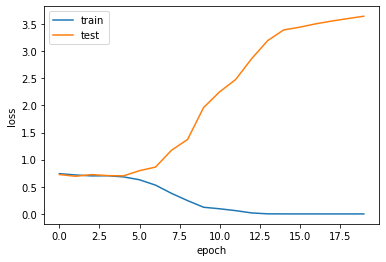

In [0]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list)
plt.plot(valid_loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [0]:
model.load_state_dict(torch.load(PATH+'NEU.pt'))
#test_loss, test_acc = evaluate(model, traindl, criterion)
#print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

<All keys matched successfully>

In [0]:
 m = nn.Conv1d(16, 33, 3, stride=1)
 input = torch.randn(20, 16, 50)
 output = m(input)
 print(output.shape)

torch.Size([20, 33, 48])


In [0]:
import dill
torch.save(txt_field,PATH+'EXT_txt.pt',pickle_module = dill)

In [0]:
NEUActivation = {}
def get_NEUactivation(name):
    def hook(model, input, output):
        NEUActivation[name] = output.detach()
    return hook

In [0]:
for name, layer in model.named_modules():
    print(layer)
    layer.register_forward_hook(get_NEUactivation(name))

CNN1d(
  (embedding): Embedding(10002, 300, padding_idx=1)
  (convs): ModuleList(
    (0): Conv1d(300, 80, kernel_size=(3,), stride=(1,))
    (1): Conv1d(300, 80, kernel_size=(4,), stride=(1,))
    (2): Conv1d(300, 80, kernel_size=(5,), stride=(1,))
  )
  (conv2): Conv1d(1, 100, kernel_size=(2,), stride=(1,))
  (fc1): Linear(in_features=300, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
Embedding(10002, 300, padding_idx=1)
ModuleList(
  (0): Conv1d(300, 80, kernel_size=(3,), stride=(1,))
  (1): Conv1d(300, 80, kernel_size=(4,), stride=(1,))
  (2): Conv1d(300, 80, kernel_size=(5,), stride=(1,))
)
Conv1d(300, 80, kernel_size=(3,), stride=(1,))
Conv1d(300, 80, kernel_size=(4,), stride=(1,))
Conv1d(300, 80, kernel_size=(5,), stride=(1,))
Conv1d(1, 100, kernel_size=(2,), stride=(1,))
Linear(in_features=300, out_features=80, bias=True)
Linear(in_features=80, out_features=1, bias=True)
Dropout(p=0.5, inplace

In [0]:
 def breakEssay(essay):
    l=[]
    curr=""
    words=word_tokenize(essay)
    ct=0
    for word in words:
        ct+=1
        if word=="." or word=="!" or word=="?" or ct%50==0:
            if len(curr)==0:
                curr=""
                ct=0
                continue
            curr+=word
            l.append(curr)
            curr=""
            ct=0
            continue
        curr+=word+" "
    return l

In [0]:
def extract_NEUfeatures(model,text,min_len=5):
  model.eval()
  # tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
  tokenized = [tok for tok in tokenize(text)]
  print(len(tokenized))
  if len(tokenized)>3000:
    tokenized=tokenized[:3000]
  if len(tokenized) < min_len:
      tokenized += ['<pad>'] * (min_len - len(tokenized))
  indexed = [txt_field.vocab.stoi[t] for t in tokenized]
  tensor = torch.LongTensor(indexed).to(device)
  # tensor = tensor.T
  # print(tensor.size(),"tens")
  tensor = tensor.unsqueeze(0)
  tensor = tensor.T
  print(tensor.size())
  model(tensor)
  return NEUActivation['fc2']




In [0]:
extract_NEUfeatures("I've decided that I want to write for travel and leisure magazine. I love to write. I think I am pretty good at it too. My brother went back to Houston to interview for a job with a real estate agency. He want s to be a commercial realtor. No matter what my brother decides to do he will be really successful. I'm not saying that I am a psychic or anything like that, but I know how badly my brother wants to be successful, and when he wants something, he goes out and gets it. Brian and I have become much closer as I have gotten older. He is being so nice to me since I got to Austin too. I think he is realizing that I am not such a bad kid after all. He always tells me to be careful and look out for myself because he won't always be in Austin to take care of me. My brother and my dad look a lot alike too. my dad is really tall: Six feet seven inches tall to be exact. H played basketball in high school, but he wasn't good enough to play in college. I think that is why he always pushed my brother to play so much that he drove Brian away from the sport. I played field hockey in high school. If I didn't come to The University of Texas, I was going to try to play field hockey at a division one school. I'm really happy with the decision I made though. I am having so much fun here. I really miss my family, or, I guess you could say, lack thereof, in Houston. I miss my mom and my step-dad, and my dad. My brother told me that he was so much happier when he moved to Austin. I could tell too because he didn't come home very much his freshman year. I don't think my brother likes my mom very much because whenever he comes home, they fight. I think my brother is still bothered by the divorce. I never gave myself a chance to be bothered, so I think now that I am away from home and I have all of this time to think, the divorce is starting to bother me. I wonder what parent's weekend is going to be like. I guess I'll ask my brother what he did when both of our parent's showed up ready and willing to steal him from the other parent. I will just divide up the weekend: one parent gets me one night, and the other parent will get me the next night. What is sad, is that I want to get them the whole weekend: both parents on both nights. I hate it when my friends' parents are around because it makes me think of how I can't have my real family back together ever again. By the way, I have a terrible habit of feeling sorry for myself. Things could be so much worse. I feel really lucky to be able to attend college, live where I live, have both parents who love me, be blessed with so much athletic ability. I know I am lucky, but every now and again I like to play the victim. My boyfriend is the best friend I could ever have. He always wants me to feel like I can talk to him, but he never lets me make excuses for myself if you know what I mean. He always reminds me that everyone has their hardships, but those who choose to overcome their hardships instead of letting their hardships overcome them, those are the ones who end up being happy. Twenty minutes is up! ")

684
torch.Size([684]) tens
torch.Size([684, 1])


tensor([[-0.1342860013]], device='cuda:0')

In [0]:
for key, val in NEUActivation.items():
    print(key,val.size())

embedding torch.Size([684, 1, 300])
convs.0 torch.Size([684, 80, 2998])
convs.1 torch.Size([684, 80, 2997])
convs.2 torch.Size([684, 80, 2996])
conv2 torch.Size([684, 100, 39])
fc1 torch.Size([684, 80])
fc2 torch.Size([684, 1])
 torch.Size([684, 1])


In [0]:
extract_NEUfeatures("Stream of consciousness. What should I write about. Am I supposed to have some kind of direction or am I supposed to write exactly what I am thinking. This feels like a very strange assignment. for homework it seems that it I pretty easy. Actually it would be pretty intense if this was worth more than however much it is worth. Hmm  for some reason I am blanked out, and it seems like I am thinking about nothing. Oh well. Lets see what happened today. I lucked out on my econ quiz, I was actually able to guess my way to a 100. What are the chances of that. having faith definitely pays off. I always say that it is important to have faith. That�s my motto in life. Have faith and have fun. Life is a funny thing. One minute your there and gone the next. It is like Louie the Lug Mcgurg for example. He died tragically at 18. I am 18 what happened. Somebody stepped on his fingers. And that killed him. well he was hanging of the 11th story of the hotel at the time. Poor lug. No Poor Mrs. the Lug. Now she is on the streets selling apples. The point is that the lug did not plan ahead and the government got everything. Oscar was a damn intense movie. It seems very difficult to figure out what I am thinking. Wen I try I blank out, and I keep trying to figure out what stream of consciences s then. Life is good. This entire internet business is pretty cool. I never would of thought I could write a paper, and then send it to a teacher by pushing a submit button. I wonder how much longer I will be writing this. I only have ten more minutes left. Everyone always asks what you are thinking about, when you are just sitting there thinking. Usually you say nothing because you just don't want to tell them. Now I am trying to think of what I am thinking and I am getting nothing. Cricket is a great sport. There is going to be the Sahara cup going to be played in Canada. It is India vc. Paistan. One of the biggest cricketing rivalries in the world. Team Pak is going to be victorious. Aamir sohai is a great Cricketer. I can not believe that they dropped him from the team. Granted he was a little out of form, but he would have taken the Indian crap bowlers around the park and back. This is beginning to seem kind of silly. I hope that was your point. I wonder if any body is actually going to read this. For some reason I doubt it. Whoever is reading it though I feel sorry for. That is a lot peoples garbage talk you have to read. Maybe it isn't. I have no idea what it is. This screen is really weird. How come only three lines have popped up. I have been writing for 15 minutes. Is this some kind of ploy so we can not see what we have written. I can not believe that I only thought about that now. In fact I just noticed that only this much was on the screen. Very Very Interesting. I am getting tired of typing. I am waiting for these final minutes to tick away. I hope you gain something out of this, because I don�t think I will. actually I might, but I have no idea how. I was thinking about quitting early, but what if you had some kind of device that told you how long I was on for. That is actually pretty scary. only god knows what technology can do nowadays. Anyway I hope you enjoy reading this. It is quite possible that I have enjoyed writing it. It is fun and relaxing to write something, without having o go back and proofread. It seems like you are an expert typer actually. Anyway now my 20 minutes are up, so have faith and have fun. If you read this give me an A. Even though It does not matter. This completion grade stuff is amazing. All my classes should do it.")

797
torch.Size([797]) tens
torch.Size([797, 1])


tensor([[-0.1557332873]], device='cuda:0')

In [0]:
import gc
gc.collect()

3420

In [0]:
extract_NEUfeatures("Ok twenty minutes. what am I going to do tomorrow night?  What am I going to do tonight I've got lots of work to do. Man, there's lots to do and little time to do it in. I can't  wait, till I finish this. only. too much time left. What else, to write about. I have no stream of consciousness. ok, it's great to be next door to the RA, there's always a party next door, it  makes it easier to study that way. what else, what else. I�ve got lots to do  tonight. what else. Austin, cool place. my roommate�s studying, that�s what I've got to do. I wish I had a TV. it gets so boring at night. I�ve got to call my girlfriend, man I miss her. . boy I�m tired. this doesn't look like a lot of writing for. . 6 minutes. only six minutes. that means there's fourteen minutes left. I've got a real impressive stream of consciousness, and I�m a good speller too  Fish think better than I do. what else. uh. I've got to go to the store buy  some food. go work out tomorrow. am I almost done yet. nooo. lots more time left  A guy in a coma, probably has a better stream of consciousness. what do I need to do tomorrow. I think I�m going to apply for a credit card. why not?  man I�m hungry. ten minutes left. halfway through. psychology. I hope this class will be interesting. it's a lot different than I thought it would be, all we do is fill out surveys about stuff. Oh well,, I�m not looking forward to doing these experiment/research requirements. But it's gotta be better than writing a paper  I guess he paper is used as an alternative, because they know nobody will want to write a paper. and they want everybody to participate in the experiments seven minutes left  UT, UT, there's a game on Saturday, I�m gonna have to get my tickets tomorrow before  they're all out. I don't want to sit all the way up at the top. my first game, can't wait, gonna be cool. I�m glad I didn't go to Aggieland five minutes and counting. What else. chemistry. I�ve got too much to do English. she assigned over one hundred pages of reading in two days. Chemistry. calculus. way too much too think about. college is gonna be more difficult than highschool, I can already tell this. three minutes. not bad. Wow I just got e mail I wonder who it is,,, I�d like to know, but I've got two minutes left. It doesn't seem like its been twenty minutes. but oh two minutes left. I�m sure this is not what they wanted. but that�s me twenty four hours a day  pretty sad. oh well. come on come on one minute. yes  well this has been fun, at least I've gotten it finished. alright.")

tensor([[ 0.0219308473, -0.2354600579, -0.1367189288,  ...,
         -0.1697158813,  0.1082253382,  0.1064427644],
        [ 0.0989696831, -0.2515591085, -0.1169861704,  ...,
         -0.1206608191,  0.0899716839,  0.1239754930],
        [ 0.0704737306, -0.2468495071, -0.1653311402,  ...,
         -0.1650302708,  0.0614018664,  0.0870374590],
        ...,
        [ 0.0484694503, -0.2910081744, -0.1935603023,  ...,
         -0.1511511207,  0.1782862842,  0.2752082050],
        [ 0.0700669289, -0.2510829866, -0.1489408910,  ...,
         -0.0852256939,  0.0163310841,  0.0725462735],
        [ 0.0484694503, -0.2910081744, -0.1935603023,  ...,
         -0.1511511207,  0.1782862842,  0.2752082050]], device='cuda:0')

In [0]:
extract_NEUfeatures("I wanted to write about something traumatic that happened to me because, apparently, traumatic experiences and how to deal with them is a pretty big fandango in this class. Something just happened, though, so I want to write about that and see where it takes me in the next nineteen minutes or so. The computer assistant in the theatre department (where I am right now, being a theatre major and all) just complimented me on my hat, a black fedora I bought in Greenwich Village about a year and a half ago. I was visiting for about a week over spring break and auditioning for the elusive Experimental Theatre wing of NYU's Tisch School of the Arts. After a fairly successful audition I concentrated all of my efforts of exploring, something I had done about seven or eight months earlier the first time I visited. This time I was alone, though. The time before I had my brother, eighteen months my junior and my closest friend, at my side and all was well. This time I had to w2ait a couple of days for his arrival, since he couldn't get off school and I could, being a senior and having a few excused absence ""college days"" on my hands. So I set out to explore and found a bar in the mob district of Little Italy that didn't ID and I found myself drunkenly wandering the streets of New York, stumbling upon Strawberry Fields in a haze and not realizing the significance until about a week later. After three days of being lost in my drugged little haze my brother joined me. When I picked him up at the airport I noticed that I had taken to thinking of myself as a New Yorker. I had adopted the city and there was a definite change in the way my brother and I related to each other. This changed over the next four days, though, as he assimilated into New York the way I had and we set out to Little Italy to begin our evenings with a little pasta, a Nat King Cole impersonator, a jug of white wine every night, and a restaurant owned by the mob.  After taking in as much of the culture and the underbelly of the city we found ourselves down to our last (having just dropped twenty bucks on some Thai food that smelled like sewer filth). It was our second to last day in the city and we decided to thrift store shop and try to extend our dollars as far as they would go. Then we saw them. In a small shop in the Village (not that there aren't a billion of them) we both saw fedoras that just said ""you"". We ended up dropping our last fifty dollars on our new hats and had to pay for our ride to the airport ( a limo, surprisingly cheaper than a taxi because it had a set fare) with a handful of quarters. We hadn't eaten for two days and there wasn't a meal of any kind on the plane (not even peanuts) so we wound up in Houston on a two hour layover with nothing to do, empty stomachs, and no money. I ended up begging, trying to sell a stack of demo tapes I had cut for two bucks a pop. I ended up selling two, and we ate the best Taco Bell that has ever been eaten by a human. I remember that the only people who bought the tapes were other musicians. Maybe it's a karma thing (""Wow, that guy looks pathetic. Better buy his tape because that could be me someday. "")  One way or the other they understood. I was upset just because my plan was to randomly hand out this stack of tapes to people as they departed for different corners of the country, hoping that they would like it and that underground distribution would abound. Maybe it worked: I still don't know. I know it was passed around quite a bit in south Texas, but not much further than that. Oh, well. By the by, I'm really tired right now because my band played a two hour show last night. We haven't played that long in about a year, since clubs usually limit you to an hour or less. We used to go two hours without even trying when we were playing for our friend's parties, but now we've gotten lazy. Last night really woke us up. I was so drenched in sweat that I actually had to wring out my shirt after the show. We didn't even get a decent crowd until the last thirty minutes or so. That's ok. Better things will come along soon enough. We play every Thursday at Black Cat, which has no cover and is all ages. For some reason, this alone does not attract a crowd. It's really upsetting. I know we're not a bad band, so it's really frustrating when you can't talk people out of disco dancing at Bob Popular to enjoy a free show that accepts all ages and doesn't involve a DJ. Someday. About that traumatic experience. About five months ago I was hit by a car while I was crossing the street into Trudy's off Guadalupe. It was late and I was wearing all black and the guy didn't see me. I was looking the other way because I saw the car that hit me but he seemed too far away to reach me. I was more concerned about cars coming from the other direction, which is a curving road that is hard to see down. When he hit me his fender shattered my leg and I was thrown onto his windshield. He didn't brake until then and the force of him braking as I hit the windshield sent me flying into the road about twenty feet out. I never lost consciousness and never really felt all that dazed or affected by it. I just calmly looked up, announced that my ""fucking leg was broken"" and asked one of my friends to call 911. Then I just lay down in the road waiting for the ambulance. It started to rain. That night I was taken to Brackenridge and left alone for about an hour at a time in the ER. Only one of my friends cam to visit me. She held my hand while they pieced my leg back together and set it into a cast. They had already pumped me with morphine and I heard them mumble about amputation a time or two, but eventually they settled on inserting a rod from my knee to my ankle. The morphine did nothing to me, though, because they gave it in light doses and after years of recreational drug use I wasn't really affected. That and the pain was coming from the one part of my body where intravenous drugs couldn't possibly go. I ended up just biting down on a folded-up blanket, not wanted my screams to disturb others in the ER. Over the next three days I was observed and recovered quicker than anyone imagined. My family came to be with me from San Antonio, except for my dad who was in Orlando on business. He wanted to rush to Austin to be with me but I didn't want him to see me tied up to machines and weak. I knew he couldn't handle it. After about a half hour of coaxing he stayed in Orlando. He hasn't had a drop of alcohol in twenty years after getting a kidney removed before I was born. That night he drank himself into submission. Slowly my friends from the theatre department began creeping in until I had a steady stream of visitors and a room full of flowers, candy, and porn (don't ask). The faculty came to make sure that I was alright, something I never would've expected, and one night my nurse ( a Mary Poppins sort of woman) turned my bed so that I could see the tower lit up in orange. I've never had school spirit or pride in any organization whatsoever, but for some reason I cried. For some reason I loved the sight of the tower at that moment. I've recovered completely. I was angry for a while and spent a lot of time screaming and damning anyone who could walk while I made my way around in a wheelchair. I marveled at the fact that, even when I was on crutches, nice families at the Arboretum would still pull their children closer and hold their purses tighter. I began to keep a journal, but by the time I had written five entries my anger was gone. My depression was gone. I couldn't even dwell of death, which I know I had cheated. I was just glad to be alive and to put it all behind me. Now I'm physically and emotionally recovered. I don't have nightmares and I don't fear cars. I don't know why. Maybe I'll learn that this semester. For some reason I recovered very nicely in all aspects from this whole awful little episode.  The good thing is that I'm happy and sober now. I had attempted suicide twice this past year, once just two weeks before the accident. Then I was put in a situation where I didn't try and death actually came for me, and I fought to stay alive. That's always struck me as odd. Oh well. For whatever reason I am a happier, if quieter person. Things are good. I'm looking forward to psychological experiments this year. Now I'm off. I've written for about thirty minutes and I think it's time for a cigarette. Bye bye now.")

RuntimeError: ignored

In [0]:
extract_NEUfeatures("4. 57 checking in don't know where to start. I do this a lot though kind of relieves stress like candles and music and flowers haha really girly, huh? oh well, I guess that's me more like a girl on the inside. outside is just comfortable. god, my hair is annoying. it's hot as hell, too thick curly hair doesn't go well with the texas heat I'm writing and all I'm thinking is that if you really do read this, how exactly am I being judged man, this could be an essay about me and my identity and how I interpret myself but that wouldn't let you decide for yourself. and I'm way into that. I want to decide. it can be good, bad, whatever haha it's funny when it's a bad decision, but always an experience my Japan far east competition in volleyball bad time to get caught volleyball captain, a lot of responsibilities damn, I miss volleyball but I don't know if I could survive it definitely something fun to do, but no. rotc takes way too much time hahaha only 24 hours. I remember Korea shoot I didn't even know what it was to sleep unless I was riding in a bus getting somewhere awww away trips those rocked memories. friends. love. trust. heartache. god, I miss Korea. I can't believe I talked to Keith and marry I miss them a lot this college thing is really cool, but dang, nothing compares to serious friendship. I miss my baby damn the fact that he's way younger. it doesn't' matter. I'm tired of everyone's ""idea"" of what is right for me. I loved him for that I can always be myself. whatever that is we'll see. I wonder if I'm going to ""find myself"" here haha this is the place for it, right? ~~bisexuality~~ I mean it's college and all I'm supposed to understand life and myself and who I am and what I'm like this seems more like an email I would send to phillip we were always like this like reading each other's diary in an email. I wonder what he's up to there are a lot of people like that some that I wouldn't mind forgetting about but why? they all touched me in some way haha that sounds sexual I can't believe I admitted to mars before tat or seo or anyone I didn't think I could talk to her like that it takes a lot of guts on both sides for us to have what we have I love her for that I know she feels guilty. we'll see hopefully this will be a lifelong friendship I'm so lucky for that and I thank god for it not like most people: only talk to him when they need something it's funny how religion works it's only prominent in people's lives when they are in need of something then again, I guess that's how a lot of things work I am learning, though not the innocent, little, trusting girl I used to be or at least, not as much haha Korea taught me that I owe my life to that place more the people than the actual place, I guess. more seo than anything I love him I should feel guilty I should actually be censoring my thoughts right about now but, I guess that wouldn't be the assignment. I love ben. I love seo and I would die if I didn't have both of them in my life selfish? I don't know isn't everybody in some way? I think as long as all the people involved accept and are comfortable and happy. happiness is so important. it's funny when people are happy. I don't have to be happy but I couldn't live with myself otherwise so many things play on happiness love. trust. comfort dang, I think I said that before this is something I would send to Mr. clausen I hope his father is okay I would know how hard it would be for him if he wasn't damn. CSM I hope you're watching over me and I know I do some pretty messed up things stuff you wouldn't expect from me but, it's the truth I guess that's a good thing knowing me for who I am maybe it's not all good ben would die if he knew the entire truth can I live with myself knowing I cheated him???? I don't know air force honor code ""I will not lie, steal or cheat or tolerate among us anyone who does"". do I absolutely have to live with that? isn't it, after all, my decision who will know, right? but, no. I couldn't do that the only thing is ben right now my only source of guilt then again, also my soul source of happiness and love and passion and pleasure I hope all that won't turn into regret and pain. god, after rod, I don't know if I can handle that I don't know I would become another American girl I am so not that or at least, I would argue that I'm not whatever. I don't even remember when I started I don't think I'm supposed to be thinking about that maybe this is all wrong. maybe I'm supposed to be doing this word association thing cloud. picnic. ben. love. good thing. sex. passion. seo. lifelong friend, lover, everything I want and need. kind of like my mom except not I don't know should it be words or sentences I think that I think in phrases it's actually harder writing one word at a time whatever. damn, I need a cigarette shit, but I promised 7 today I think I passed that a few hours ago damn smoker's alley. haha is that what it's called. hahaha I feel so unamerican. mars told me I would be hahaha. it's all good: the allAmerican blond ass Keith feels isolated. I'm still okay. it's a good thing. I don't know for how long I'm scared shitless that I'm going to get cancer or something not because I'm going to die shoot, I could care less. I'm happy. I can dies happy. I will die happy. it's just because my mom would die I remember telling her. you know she cried I've never seen her cry only when it somehow deals with me. damn, she loves me god, that is the greatest thing of all knowing that your heart is in the teeth of your creation wow sounds like a JEWEL song I should listen to her very inspiring kind of like talking to people who are passionate about what they do. damn, I love that maybe that's why I'm big into guys who sing and write poetry it's funny, because ben doesn't do either one, and I am so in love with this guy. shit, I don't even want kids, and I would have them for him he knows that I hope it'll last. I figure this is the hardest part. me in college him still in hS I really don't want to deny him a high school social life he's sweet about it I don't know I don't want him to think in years from now ""what if"". you know??? god, I hope not. but I make him happy and he makes me happy and we complete each other hahaa same thing with seo god, this is weird. james doesn't think it'll last. a triangle with me as the main point I don't know shoot, I'm special enough, right? who says I can't have it all that sounds conceited. but I'm not. not if you really got to know me anyway confident? I don't know. more uncertain and scared. reminds me of my identity poem: TYPICAL ECCENTRICITY. whoa it's 5. 20")

RuntimeError: ignored

In [0]:
extract_NEUfeatures("help")

In [0]:
# import punkt
nltk.download('punkt')